In [3]:
#Import libs, read dataset, drop unusefull columns (occasionally occured during parsing of data)

import pandas as pd
import numpy as np
import datetime as dt

columns=['Sp_nummer', 'Due_date', 'Fc_horizon', 'Fc_date', 'Fc_and_order', 'Billing']
df = pd.read_excel(r'C:\Users\MikhailPetrovBrainer\Documents\Private\SoSe22\Projektseminar\data\q4_2017.xlsx', index_col=None, header=1)
df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

# Generall Data Prepatation
1. Inspection
2. Convert strings to integers
3. Convert date to ISO format

In [2]:
#Inspect dataframe

df.head()
# df.info()

,Sp_number,Due_date,Fc_horizon,Fc_date,Fc_and_order,Billing
0,Product_19,201813,13,201752,176316,NaN
1,Product_20,201813,13,201752,516510,NaN
2,Product_22,201813,13,201752,237587,NaN
3,Product_30,201813,13,201752,393741,NaN
4,Product_39,201813,13,201752,92112,NaN


In [3]:
#Remove NaN

df['Billing'].loc[df['Billing'].isna()] = 0
df['Fc_and_order'].loc[df['Fc_and_order'].isna()] = 0
df.head()

<ipython-input-3-d2a65cc15a89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Billing'].loc[df['Billing'].isna()] = 0
<ipython-input-3-d2a65cc15a89>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fc_and_order'].loc[df['Fc_and_order'].isna()] = 0


,Sp_number,Due_date,Fc_horizon,Fc_date,Fc_and_order,Billing
0,Product_19,201813,13,201752,176316,0.0
1,Product_20,201813,13,201752,516510,0.0
2,Product_22,201813,13,201752,237587,0.0
3,Product_30,201813,13,201752,393741,0.0
4,Product_39,201813,13,201752,92112,0.0


In [4]:
#Save products. Create converter from product as string to product as integer and reverse

products = df['Sp_number'].unique()
prod2idx = {}
idx2prod = {}
for idx, prod in enumerate(products):
    if prod not in prod2idx:
        prod2idx[prod] = idx
        idx2prod[idx] = prod

In [5]:
#Add column with integer product names

products_int = []
for idx, row in df['Sp_number'].iteritems():
    products_int.append(prod2idx[row])
    
df['products'] = products_int

In [6]:
#Convert dates (Due date and Fc date) from YearWeek-format to iso format YYYY-MM-DD

years = []
weeks = []
for i,r in df['Due_date'].items():
    years.append(str(r)[:4])
    weeks.append(str(r)[4:])

In [7]:
df['year'] = years
df['week'] = weeks
df['year'] = df['year'].astype(int)
df['week'] = df['week'].astype(int)
idx4drop = df.loc[df['week']>52].index
df.drop(idx4drop, inplace=True)

In [9]:
from datetime import date

df['ddate'] = df[['year', 'week']].apply(lambda x: date.fromisocalendar(x['year'], x['week'], 1), axis=1)

In [10]:
years = []
weeks = []
for i,r in df['Fc_date'].items():
    years.append(str(r)[:4])
    weeks.append(str(r)[4:])

In [11]:
df['year_'] = years
df['week_'] = weeks
df['year_'] = df['year_'].astype(int)
df['week_'] = df['week_'].astype(int)
idx4drop = df.loc[df['week_']>52].index
df.drop(idx4drop, inplace=True)

In [12]:
df['fdate'] = df[['year_', 'week_']].apply(lambda x: date.fromisocalendar(x['year_'], x['week_'], 1), axis=1)

In [13]:
df.head()

,Sp_number,Due_date,Fc_horizon,Fc_date,Fc_and_order,Billing,products,year,week,ddate,year_,week_,fdate
0,Product_19,201813,13,201752,176316,0.0,0,2018,13,2018-03-26,2017,52,2017-12-25
1,Product_20,201813,13,201752,516510,0.0,1,2018,13,2018-03-26,2017,52,2017-12-25
2,Product_22,201813,13,201752,237587,0.0,2,2018,13,2018-03-26,2017,52,2017-12-25
3,Product_30,201813,13,201752,393741,0.0,3,2018,13,2018-03-26,2017,52,2017-12-25
4,Product_39,201813,13,201752,92112,0.0,4,2018,13,2018-03-26,2017,52,2017-12-25


In [14]:
#Test: fdate minus ddate is equal to Fc horizon

test = df.iloc[1]
test['ddate'] - test['fdate']
#datetime.timedelta(days=91) == 13 weeks 

datetime.timedelta(days=91)

# Descriptive Statistics

## Forcast, Billings and Error for Product_19

In [495]:
#Might be usefull
import datetime as dt
# 
for idx, test in hor1.iterrows():
    print(test['fdate'] + dt.timedelta(weeks=int(test['Fc_horizon'])) == test['ddate'])

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [496]:
#Might be usefull
t = np.arange(dt.datetime(2013,12,23), dt.datetime(2018,12,25), dt.timedelta(days=7)).astype(dt.datetime)

In [499]:
#Poduct with index 0 and billings starting from 2016

df_ = df[['product', 'fdate', 'ddate', 'horizon', 'forecast', 'billing']]
df_0 = df_.loc[(df_['product'] == 0) & (df_['ddate'] > dt.date(2016,1,1))]

In [502]:
#Rewrite dataset: dictionary with key equals to Fc_horizon and value is equal to a tulpe (forecast, billing, error, date)
#Error = billing - forecast for the due_date XXXX

idx2date = {}

for i,r in df_0[['ddate', 'horizon', 'forecast', 'billing']].iterrows():
    horizon = r['horizon']
    if horizon not in idx2date:
        idx2date[horizon] = []
    forecast = r['forecast']
    billing = r['billing']
    date = r['ddate']
    error = billing - forecast
    idx2date[horizon].append((forecast, billing, error, date))

In [503]:
#Prepare data for drawing billings-line

df_duplicates = df_0.loc[df_0.duplicated(subset=['ddate','billing'])]
df_0_ = df_0.drop(df_duplicates.index)
x = df_0_['ddate'].values
y = df_0_['billing'].values

Text(0.5, 1.0, 'Billings and Forecasting Error for Fc_Horizon [12] from the year 2016')

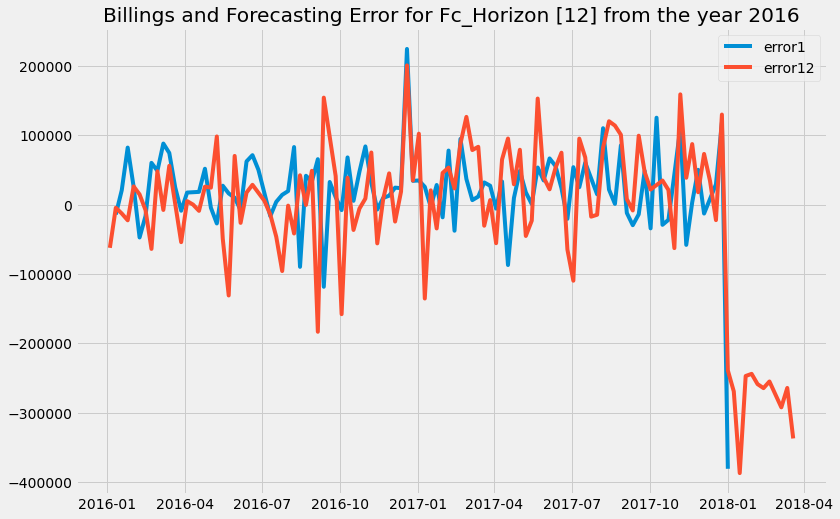

In [512]:
#Create a chart with 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
# ax.plot(x,y, label='Billing')
horizon = np.arange(1,2)
for idx in horizon:
    x = [date for (forecast, billing, error, date) in idx2date[idx]] 
#     y = [forecast for (forecast, billing, error, date) in idx2date[idx+1]]
    ye = [error for (forecast, billing, error, date) in idx2date[idx]]
#     ax.plot(x,y, label=('horizon'+str(idx+1)))
    ax.plot(x,ye, label=('error'+str(idx)))
    
horizon = np.arange(12,13)
for idx in horizon:
    x = [date for (forecast, billing, error, date) in idx2date[idx]] 
#     y = [forecast for (forecast, billing, error, date) in idx2date[idx+1]]
    ye = [error for (forecast, billing, error, date) in idx2date[idx]]
#     ax.plot(x,y, label=('horizon'+str(idx+1)))
    ax.plot(x,ye, label=('error'+str(idx)))

ax.legend()
plt.title(f'Billings and Forecasting Error for Fc_Horizon {horizon} from the year 2016')

{'whiskers': [<matplotlib.lines.Line2D at 0x289c7f764f0>,
 'caps': [<matplotlib.lines.Line2D at 0x289c7f76550>,
 'boxes': [<matplotlib.lines.Line2D at 0x289ca8393a0>],
 'medians': [<matplotlib.lines.Line2D at 0x289c7ebcdc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x289c7ebc220>],
 'means': []}

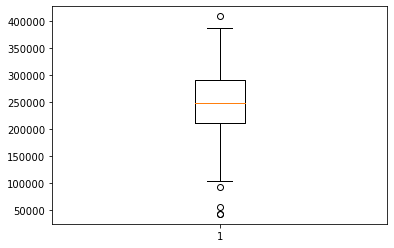

In [316]:
billings_boxplot = df_0_['Billing'].loc[df_0_['Billing']!=0].values
plt.boxplot(billings_boxplot)

In [317]:
df_0_['Billing'].loc[df_0_['Billing']!=0].describe()

count       104.000000
mean     244331.759615
std       72380.860703
min       43000.000000
25%      212000.000000
50%      247500.000000
75%      290750.000000
max      409000.000000
Name: Billing, dtype: float64

In [319]:
df['error'] = df['Billing'] - df['Fc_and_order']
df['error']

0       -176316.0
1       -516510.0
2       -237587.0
3       -393741.0
4        -92112.0
           ...   
27059    -13052.0
27060    -33778.0
27061     26425.0
27062     40063.0
27063     40891.0
Name: error, Length: 26804, dtype: float64

## Overview 1

### Billings
1. Remove duplicates for subset products, ddate and billings
2. Aggregate by ddate
3. Remove zeros by billings (zero <=> future period)
4. Extract general statistics
5. Create box-plot and define outliers (on which date we got an outlier)
6. Chart billings to date

In [4]:
mapper = {
    'products': 'product',
    'Fc_horizon': 'horizon',
    'Fc_and_order': 'forecast',
    'Billing': 'billing'
}

In [5]:
df.rename(columns=mapper, inplace=True)

In [18]:
df_ = df[['product', 'billing', 'ddate']].copy()

In [19]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26804 entries, 0 to 27063
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   product  26804 non-null  int64  
 1   billing  26804 non-null  float64
 2   ddate    26804 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 837.6+ KB


In [20]:
df_duplicated = df.loc[df_.duplicated(subset=['product', 'ddate', 'billing'])]
df_.drop(df_duplicated.index, inplace=True)
df_.drop(df_.loc[df_['billing']==0].index, inplace=True)

In [21]:
df_

,product,billing,ddate
810,0,301000.0,2017-12-25
822,1,904000.0,2017-12-25
834,2,210000.0,2017-12-25
846,3,357500.0,2017-12-25
858,4,157500.0,2017-12-25
...,...,...,...
26999,5,747500.0,2013-12-30
27012,6,92500.0,2013-12-30
27025,7,207500.0,2013-12-30
27038,8,210000.0,2013-12-30


In [22]:
df_by_date = df_.groupby(['ddate'], as_index=False).sum()
df_by_date

,ddate,product,billing
0,2013-12-30,42,3019500.0
1,2014-01-06,42,3214497.0
2,2014-01-13,45,3489500.0
3,2014-01-20,45,3000000.0
4,2014-01-27,45,3378500.0
...,...,...,...
203,2017-11-27,45,5334000.0
204,2017-12-04,45,6894500.0
205,2017-12-11,45,5742000.0
206,2017-12-18,45,6112500.0


In [23]:
statistics = df_by_date['billing'].describe()

In [24]:
statistics

count    2.080000e+02
mean     4.425108e+06
std      1.020605e+06
min      1.266500e+06
25%      3.770944e+06
50%      4.297500e+06
75%      5.017750e+06
max      7.233500e+06
Name: billing, dtype: float64

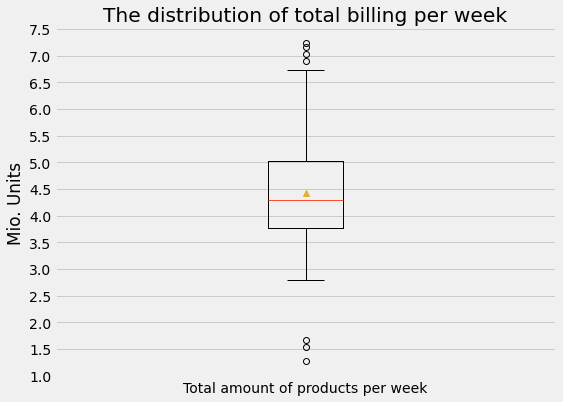

In [443]:
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots()
fig.set_size_inches(8,6)

plt.title('The distribution of total billing per week')

plt.xticks(ticks=[], labels=['Total amount of products per week'])
yticks = np.arange(round(df_by_date['billing'].min(),-6), round(df_by_date['billing'].max(), -5)+500000, 500000)
ylabels = [str(round(x/1000000, 1)) for x in yticks]
plt.yticks(ticks=yticks, labels=ylabels)
plt.ylabel('Mio. Units')
ax.yaxis.grid(True)
ax.xaxis.grid(False)
ax.boxplot(df_by_date['billing'], showmeans=True)

plt.savefig('box_general.png')
plt.show()

In [445]:
statistics['75%']
###CALCULATE OUTLIERS

5017750.0

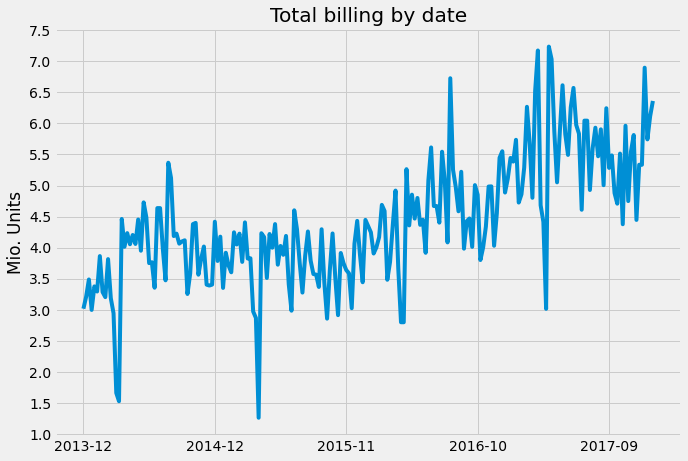

In [465]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots()
fig.set_size_inches(10,7)

plt.title('Total billing by date')
xticks = np.arange(df_by_date['ddate'].min(), df_by_date['ddate'].max(), dt.timedelta(days=336)).astype(dt.datetime)
plt.xticks(ticks=xticks, labels=[dt.datetime.strftime(x, '%Y-%m') for x in xticks])
yticks = np.arange(round(df_by_date['billing'].min(),-6), round(df_by_date['billing'].max(), -5)+500000, 500000)
ylabels = [str(round(x/1000000, 1)) for x in yticks]
plt.yticks(ticks=yticks, labels=ylabels)
plt.ylabel('Mio. Units')
plt.plot(df_by_date['ddate'], df_by_date['billing'])

plt.savefig('line_general.png')
plt.show()

#### Total billing statistics for each year
- Previous dataset
- Split by year
- Create boxplots and line charts


In [467]:
df_by_date.loc[df_by_date['ddate'] > dt.date(2017,1,1)]

,ddate,product,billing
156,2017-01-02,45,5385000.0
157,2017-01-09,45,5735000.0
158,2017-01-16,45,4726500.0
159,2017-01-23,45,4859000.0
160,2017-01-30,45,5289500.0
161,2017-02-06,45,6265500.0
162,2017-02-13,45,5677500.0
163,2017-02-20,45,4803000.0
164,2017-02-27,45,6522000.0
165,2017-03-06,45,7171000.0


In [515]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26804 entries, 0 to 27063
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sp_number  26804 non-null  object 
 1   Due_date   26804 non-null  int64  
 2   horizon    26804 non-null  int64  
 3   Fc_date    26804 non-null  int64  
 4   forecast   26804 non-null  int64  
 5   billing    26804 non-null  float64
 6   product    26804 non-null  int64  
 7   year       26804 non-null  int32  
 8   week       26804 non-null  int32  
 9   date       26804 non-null  object 
 10  ddate      26804 non-null  object 
 11  year_      26804 non-null  int32  
 12  week_      26804 non-null  int32  
 13  fdate      26804 non-null  object 
 14  error      26804 non-null  float64
dtypes: float64(2), int32(4), int64(5), object(4)
memory usage: 3.9+ MB


Text(0.5, 1.0, '2014')

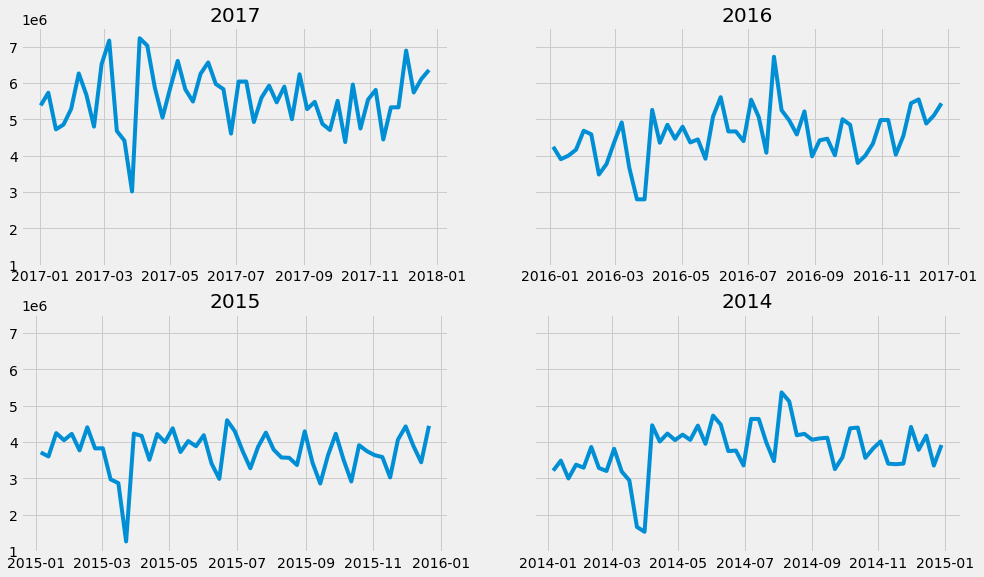

In [483]:
fig, ax = plt.subplots(2,2, sharey=True)
# fig = plt.figure()
# gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
# (ax[0,0], ax[0,1]), (ax[1,0], ax[1,1]) = gs.subplots(sharey='row')
fig.set_size_inches(15,9)
yticks = np.arange(round(df_by_date['billing'].min(),-6), round(df_by_date['billing'].max(), -5)+500000, 500000)
ylabels = [str(round(x/1000000, 1)) for x in yticks]

df00 = df_by_date.loc[df_by_date['ddate'] > dt.date(2017,1,1)]
ax[0,0].plot(df00['ddate'], df00['billing'])
ax[0,0].set_title('2017')

df01 = df_by_date.loc[(df_by_date['ddate'] < dt.date(2017,1,1))&(df_by_date['ddate'] > dt.date(2016,1,1))]
ax[0,1].plot(df01['ddate'], df01['billing'])
ax[0,1].set_title('2016')

df10 = df_by_date.loc[(df_by_date['ddate'] < dt.date(2016,1,1))&(df_by_date['ddate'] > dt.date(2015,1,1))]
ax[1,0].plot(df10['ddate'], df10['billing'])
ax[1,0].set_title('2015')

df11 = df_by_date.loc[(df_by_date['ddate'] < dt.date(2015,1,1))&(df_by_date['ddate'] > dt.date(2014,1,1))]
ax[1,1].plot(df11['ddate'], df11['billing'])
ax[1,1].set_title('2014')

# for a in ax.flat:
#     a.set()

#### Summary for aggregated data:
- Yearly drops of billings in the month 03-04
- Generally the trend is rising
-----
#### Suggestions from modeling after inspecting aggregated billing data:
- Remove outliers: interquartal_range = [Q1 - 1,5*(Q3 - Q1); Q3 + 1,5+(Q3-Q1)]
- Implement season-logic (drops in march-mai)
------

In [41]:
def calculate_interquartal_range(df, col:str, k=1.5):
    '''
    Args: dataframe and columnname for pandas.DataFrame.describe(); k defines the distance multiplicator (equals 1,5 by default)
    Return: tulpe interprets as a range [the lowest possible value; the highest possible value] for not being outlier in this dataset
    '''
    statistics = df[col].describe()
    Q3 = statistics['75%']
    Q1 = statistics['25%']
    return (Q1-k*(Q3-Q1), Q3+k*(Q3-Q1))

def detect_outliers(df, col):
    '''
    Args: dataframe and columnname where you want to find outliers;
    Return: array of indexes of outliers
    '''
    iq_range = calculate_interquartal_range(df, col)
    idxs = []
    idxs.extend(df.loc[df[col]<iq_range[0]].index)
    idxs.extend(df.loc[df[col]>iq_range[1]].index)
    return idxs

In [43]:
outliers = detect_outliers(df_by_date, 'billing')
df_by_date.drop(outliers, inplace=True)

In [50]:
df_by_date['billing'].describe()

count    2.010000e+02
mean     4.416062e+06
std      8.981207e+05
min      2.802000e+06
25%      3.772500e+06
50%      4.297000e+06
75%      4.986500e+06
max      6.725000e+06
Name: billing, dtype: float64

With outliers
- count    2.080000e+02
- mean     4.425108e+06
- std      1.020605e+06
- min      1.266500e+06
- 25%      3.770944e+06
- 50%      4.297500e+06
- 75%      5.017750e+06
- max      7.233500e+06

Without outliers
- count    2.010000e+02
- mean     4.416062e+06
- std      8.981207e+05
- min      2.802000e+06
- 25%      3.772500e+06
- 50%      4.297000e+06
- 75%      4.986500e+06
- max      6.725000e+06

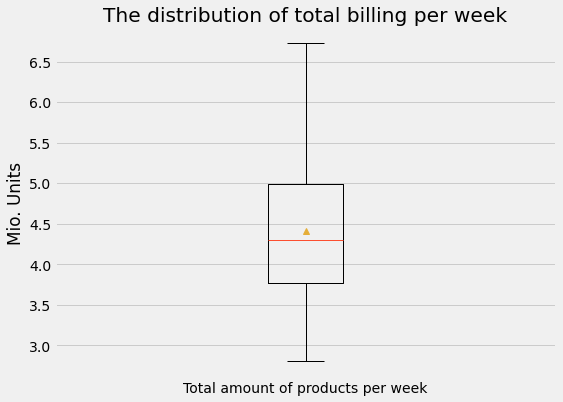

In [45]:
# Recreate boxplot without outliers

import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots()
fig.set_size_inches(8,6)

plt.title('The distribution of total billing per week')

plt.xticks(ticks=[], labels=['Total amount of products per week'])
yticks = np.arange(round(df_by_date['billing'].min(),-6), round(df_by_date['billing'].max(), -5)+500000, 500000)
ylabels = [str(round(x/1000000, 1)) for x in yticks]
plt.yticks(ticks=yticks, labels=ylabels)
plt.ylabel('Mio. Units')
ax.yaxis.grid(True)
ax.xaxis.grid(False)
ax.boxplot(df_by_date['billing'], showmeans=True)

# plt.savefig('box_general.png')
plt.show()

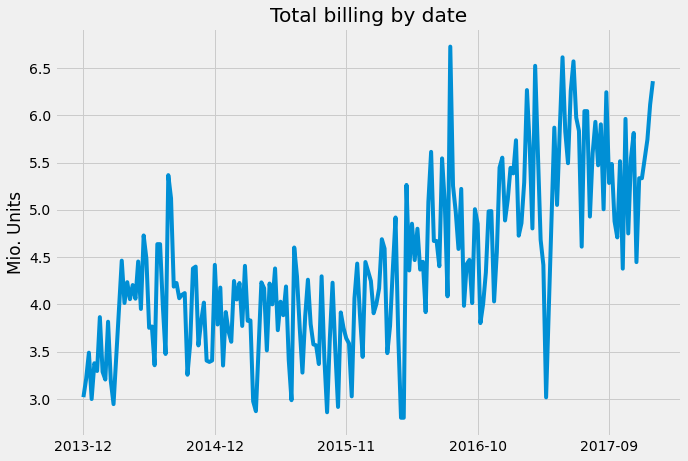

In [47]:
# Recreate Total billings by date
import datetime as dt

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots()
fig.set_size_inches(10,7)

plt.title('Total billing by date')
xticks = np.arange(df_by_date['ddate'].min(), df_by_date['ddate'].max(), dt.timedelta(days=336)).astype(dt.datetime)
plt.xticks(ticks=xticks, labels=[dt.datetime.strftime(x, '%Y-%m') for x in xticks])
yticks = np.arange(round(df_by_date['billing'].min(),-6), round(df_by_date['billing'].max(), -5)+500000, 500000)
ylabels = [str(round(x/1000000, 1)) for x in yticks]
plt.yticks(ticks=yticks, labels=ylabels)
plt.ylabel('Mio. Units')
plt.plot(df_by_date['ddate'], df_by_date['billing'])

# plt.savefig('line_general.png')
plt.show()

Text(0.5, 1.0, '2014')

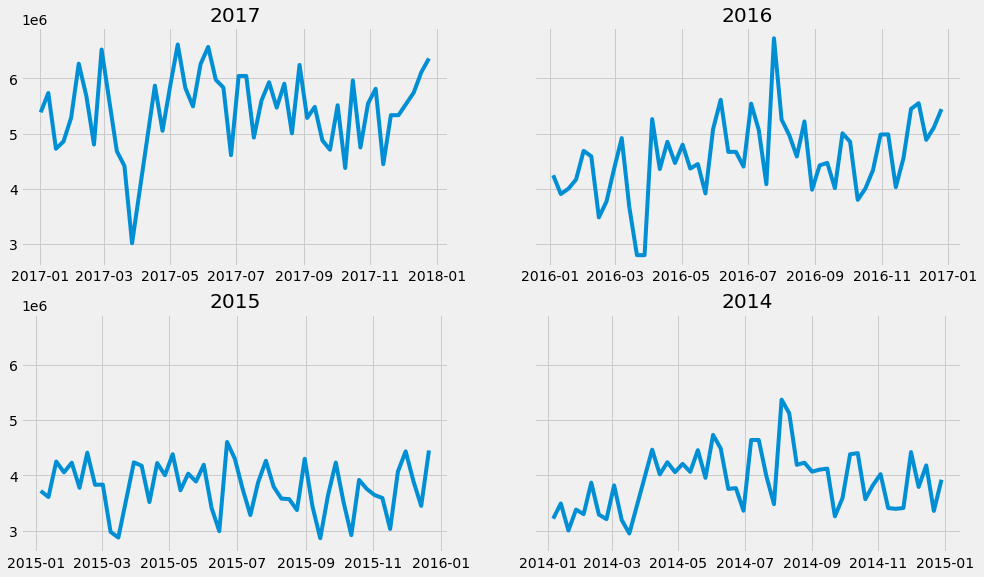

In [48]:
fig, ax = plt.subplots(2,2, sharey=True)
# fig = plt.figure()
# gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
# (ax[0,0], ax[0,1]), (ax[1,0], ax[1,1]) = gs.subplots(sharey='row')
fig.set_size_inches(15,9)
yticks = np.arange(round(df_by_date['billing'].min(),-6), round(df_by_date['billing'].max(), -5)+500000, 500000)
ylabels = [str(round(x/1000000, 1)) for x in yticks]

df00 = df_by_date.loc[df_by_date['ddate'] > dt.date(2017,1,1)]
ax[0,0].plot(df00['ddate'], df00['billing'])
ax[0,0].set_title('2017')

df01 = df_by_date.loc[(df_by_date['ddate'] < dt.date(2017,1,1))&(df_by_date['ddate'] > dt.date(2016,1,1))]
ax[0,1].plot(df01['ddate'], df01['billing'])
ax[0,1].set_title('2016')

df10 = df_by_date.loc[(df_by_date['ddate'] < dt.date(2016,1,1))&(df_by_date['ddate'] > dt.date(2015,1,1))]
ax[1,0].plot(df10['ddate'], df10['billing'])
ax[1,0].set_title('2015')

df11 = df_by_date.loc[(df_by_date['ddate'] < dt.date(2015,1,1))&(df_by_date['ddate'] > dt.date(2014,1,1))]
ax[1,1].plot(df11['ddate'], df11['billing'])
ax[1,1].set_title('2014')

plt.show()

In [52]:
1.020605e+06

1020605.0

#### Summary after removing outliers:
- the standard deviation is smaller: 898120.7 vs 1020605.0
- the data is less spreaded
- trends are unclear

## Overview 2
### Forecast
- determine the standard deviation of the difference between forecast and billings by forecast horizon
----------------
1. Aggregate data by date and by forecast horizon
2. Extract statistics for each horizon
3. Plot statistics

In [59]:
# Set up the dataframe
df_ = df[['ddate', 'horizon', 'forecast', 'billing']].copy()
df_['error'] = df_['billing'] - df_['forecast']
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26804 entries, 0 to 27063
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ddate     26804 non-null  object 
 1   horizon   26804 non-null  int64  
 2   forecast  26804 non-null  int64  
 3   billing   26804 non-null  float64
 4   error     26804 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.2+ MB


In [65]:
# Remove zeros and nans
df_ = df[['ddate', 'horizon', 'forecast', 'billing']].copy()
df_['error'] = df_['billing'] - df_['forecast']
df_.info()
nans = df_.loc[(df_['billing'] == 0) | (df_['forecast'] == 0)].index
df_.drop(nans, inplace=True)
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25994 entries, 810 to 27063
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ddate     25994 non-null  object 
 1   horizon   25994 non-null  int64  
 2   forecast  25994 non-null  int64  
 3   billing   25994 non-null  float64
 4   error     25994 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.2+ MB


In [68]:
# Group df by ddate and horizon
df_ddate_h = df_.groupby(['ddate', 'horizon'], as_index=False).sum()

In [71]:
# Test on a horizon == 1
h1 = df_ddate_h.loc[df_ddate_h['horizon'] == 1]

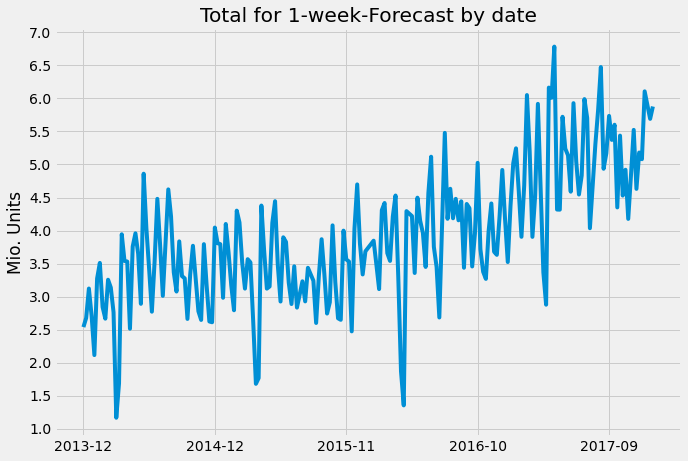

In [72]:
h1 = df_ddate_h.loc[df_ddate_h['horizon'] == 1]
fig, ax = plt.subplots()
fig.set_size_inches(10,7)

plt.title('Total for 1-week-Forecast by date')
xticks = np.arange(h1['ddate'].min(), h1['ddate'].max(), dt.timedelta(days=336)).astype(dt.datetime)
plt.xticks(ticks=xticks, labels=[dt.datetime.strftime(x, '%Y-%m') for x in xticks])
yticks = np.arange(round(h1['forecast'].min(),-6), round(h1['forecast'].max(), -5)+500000, 500000)
ylabels = [str(round(x/1000000, 1)) for x in yticks]
plt.yticks(ticks=yticks, labels=ylabels)
plt.ylabel('Mio. Units')
plt.plot(h1['ddate'], h1['forecast'])

# plt.savefig('line_general.png')
plt.show()

In [92]:
def calculate_statistics_for_forecasthorizon(df_, col='forecast', h=13):
    index_ = df_.describe().index
    df = pd.DataFrame(index=index_)
    for i in range(h-1):
        temp = df_[[col]].loc[df_['horizon'] == (i+1)]
        df[i+1] = temp.describe()
    return df

In [96]:
# Calculate statisitcs for each horizon

statistics_forecast = calculate_statistics_for_forecasthorizon(df_ddate_h)
statistics_billing = calculate_statistics_for_forecasthorizon(df_ddate_h, col='billing')
statistics_error = calculate_statistics_for_forecasthorizon(df_ddate_h, col='error')

In [106]:
# Calculate the lowest-highest mean and std of the Error

lowest_mean = statistics_error.loc['mean'].min()
lowest_std = statistics_error.loc['std'].min()
highest_mean = statistics_error.loc['mean'].max()
highest_std = statistics_error.loc['std'].max()
print(lowest_mean, highest_mean)
print(lowest_std, highest_std)

256879.71144278607 506452.845
478017.10701158864 617624.2803370712


##### Summary statistic for the error by horizon
- the lowest mean =  256879.71144278607 for horizon = 7
- the highest mean = 506452.845 for horizon 1
- the lowest std = 478017.10701158864 for horizon 3
- the highest std = 617624.2803370712 for horizon 11

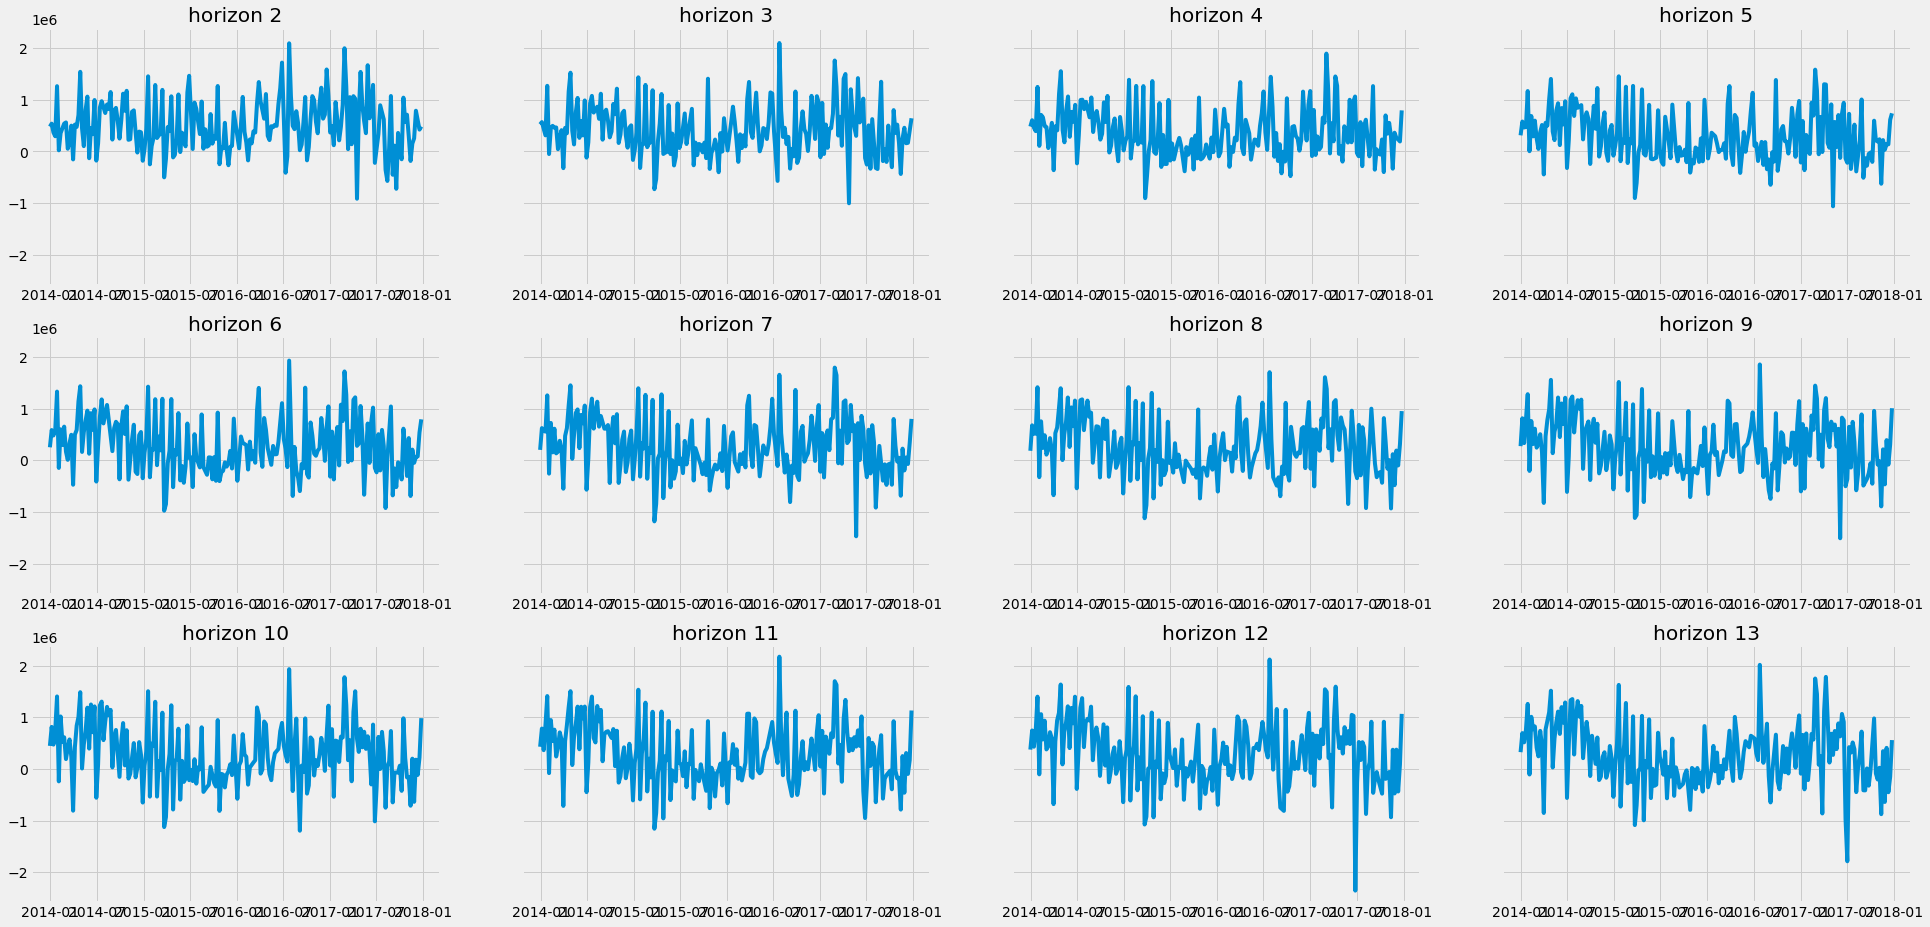

In [149]:
# Plot line chart: error for each forecast horizon
    
columns = 4
rows = 3
fig, ax_array = plt.subplots(rows, columns,squeeze=False, sharey=True)
fig.set_size_inches(30,15)

yticks = np.arange(round(df_ddate_h['error'].min(),-6), round(df_ddate_h['error'].max(), -5)+500000, 500000)
ylabels = [str(round(x/1000000, 1)) for x in yticks]

h = 1
for i,ax_row in enumerate(ax_array):
    for j,axes in enumerate(ax_row):
        temp = df_ddate_h.loc[df_ddate_h['horizon'] == h]
        h+=1
        axes.set_title(f'horizon {h}')
        axes.plot(temp['ddate'], temp['error'])
plt.show()

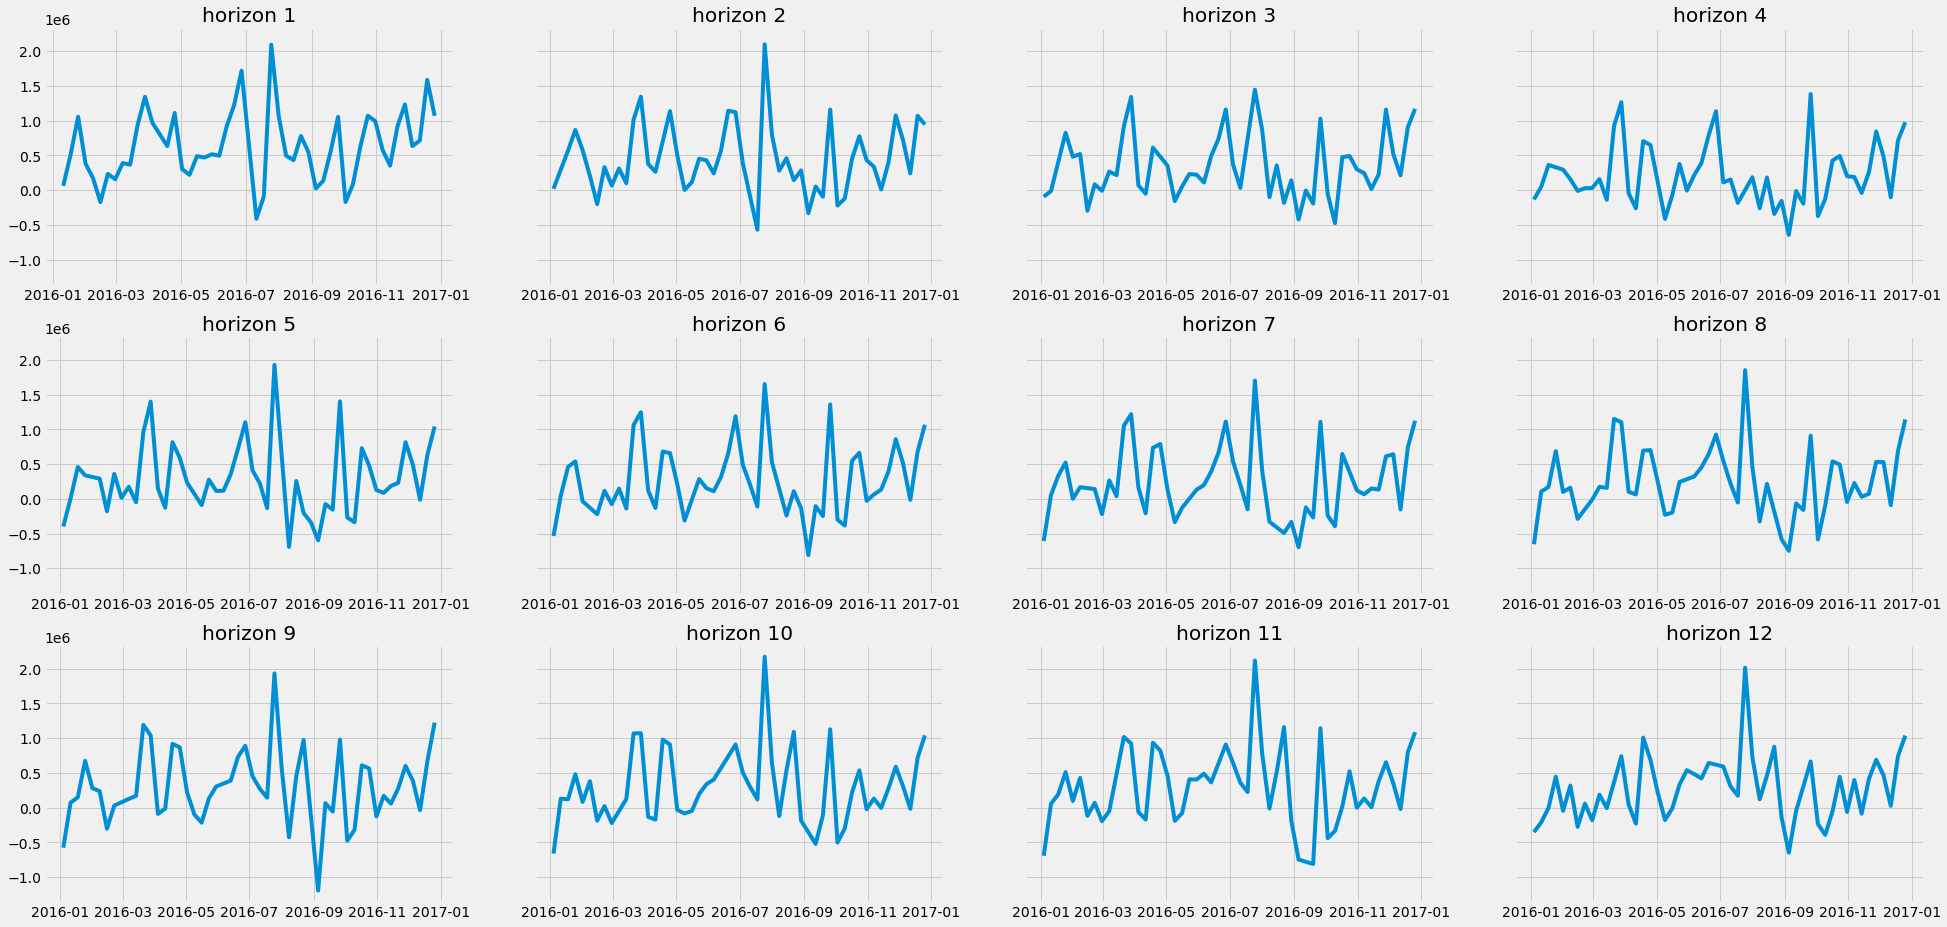

In [151]:
# Plot error for each forecast horizon for a year
start = dt.date(2017,1,1)
end = dt.date(2016,1,1)

df_ddate_h_year = df_ddate_h.loc[(df_ddate_h['ddate'] < start)&(df_ddate_h['ddate'] > end)]

    
columns = 4
rows = 3
fig, ax_array = plt.subplots(rows, columns,squeeze=False, sharey=True)
fig.set_size_inches(30,15)

h = 1
for i,ax_row in enumerate(ax_array):
    for j,axes in enumerate(ax_row):
        temp = df_ddate_h_year.loc[df_ddate_h_year['horizon'] == h]
        axes.set_title(f'horizon {h}')
        axes.plot(temp['ddate'], temp['error'])
        h+=1
plt.show()

In [162]:
df_ddate_h['error'].min()

-2354592.0

In [ ]:
# Plot box plot: error for each forecast horizon
    
columns = 4
rows = 3
fig, ax_array = plt.subplots(rows, columns,squeeze=False, sharey=True)
fig.set_size_inches(12,9)

yticks = np.arange(round(df_ddate_h['error'].min()), round(df_ddate_h['error'].max())+500000, 500000)
ylabels = [str(round(x/100000, 1)) for x in yticks]
plt.yticks(ticks=yticks, labels=ylabels)

h = 1
for i,ax_row in enumerate(ax_array):
    for j,axes in enumerate(ax_row):
        temp = df_ddate_h.loc[df_ddate_h['horizon'] == h]
        axes.set_title(f'horizon {h}')
        axes.boxplot(temp['error'], showmeans=True)
        axes.yaxis.grid(True)
        axes.xaxis.grid(False)
        axes.set_xticks(ticks=[])
        h+=1

# plt.savefig('box_errors.png')
plt.show()

## Overview 3
### Products
- determine the billing and forecast error statistics for each product
----------------
1. Aggregate data by date and by product
2. Extract billing statistics for each product
3. Plot statistics
4. Aggregate data by date, product and horizon
5. Extract forecast statistic for each product and horizon
6. Create a table for statistics

In [6]:
df_ = df[['product', 'ddate', 'horizon', 'forecast', 'billing']].copy()
df_['error'] = df_['billing'] - df_['forecast']
print(df_.info())
nans = df_.loc[(df_['billing'] == 0) | (df_['forecast'] == 0)].index
df_.drop(nans, inplace=True)
print(df_.info())

KeyError: "['product', 'ddate'] not in index"

In [170]:
df_ddate_product = df_.groupby(['ddate', 'product'], as_index=False).sum()
df_ddate_product

,ddate,product,horizon,forecast,billing,error
0,2013-12-30,0,91,5172495,2717000.0,-2455495.0
1,2013-12-30,1,91,8621338,8164000.0,-457338.0
2,2013-12-30,2,91,3044885,4095000.0,1050115.0
3,2013-12-30,4,91,1072712,1040000.0,-32712.0
4,2013-12-30,5,91,6514847,9717500.0,3202653.0
...,...,...,...,...,...,...
2073,2017-12-25,5,88,24485788,24690000.0,204212.0
2074,2017-12-25,6,88,5532587,11430000.0,5897413.0
2075,2017-12-25,7,88,3010732,2400000.0,-610732.0
2076,2017-12-25,8,88,1855000,1950000.0,95000.0


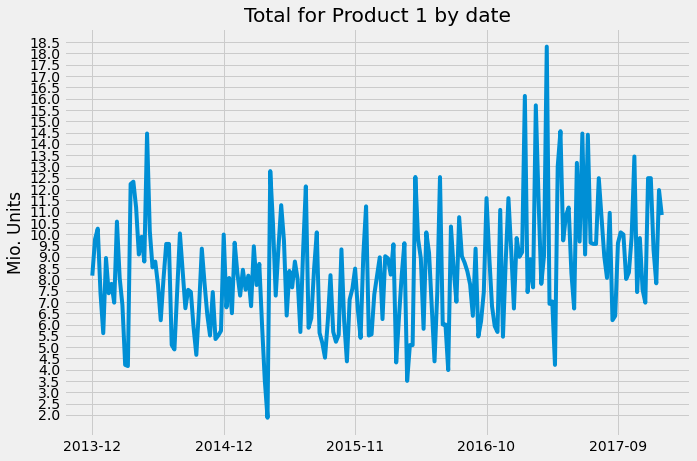

In [172]:
h1 = df_ddate_product.loc[df_ddate_product['product'] == 1]
fig, ax = plt.subplots()
fig.set_size_inches(10,7)

plt.title('Total for Product 1 by date')
xticks = np.arange(h1['ddate'].min(), h1['ddate'].max(), dt.timedelta(days=336)).astype(dt.datetime)
plt.xticks(ticks=xticks, labels=[dt.datetime.strftime(x, '%Y-%m') for x in xticks])
yticks = np.arange(round(h1['billing'].min(),-6), round(h1['billing'].max(), -5)+500000, 500000)
ylabels = [str(round(x/1000000, 1)) for x in yticks]
plt.yticks(ticks=yticks, labels=ylabels)
plt.ylabel('Mio. Units')
plt.plot(h1['ddate'], h1['billing'])

# plt.savefig('line_general.png')
plt.show()

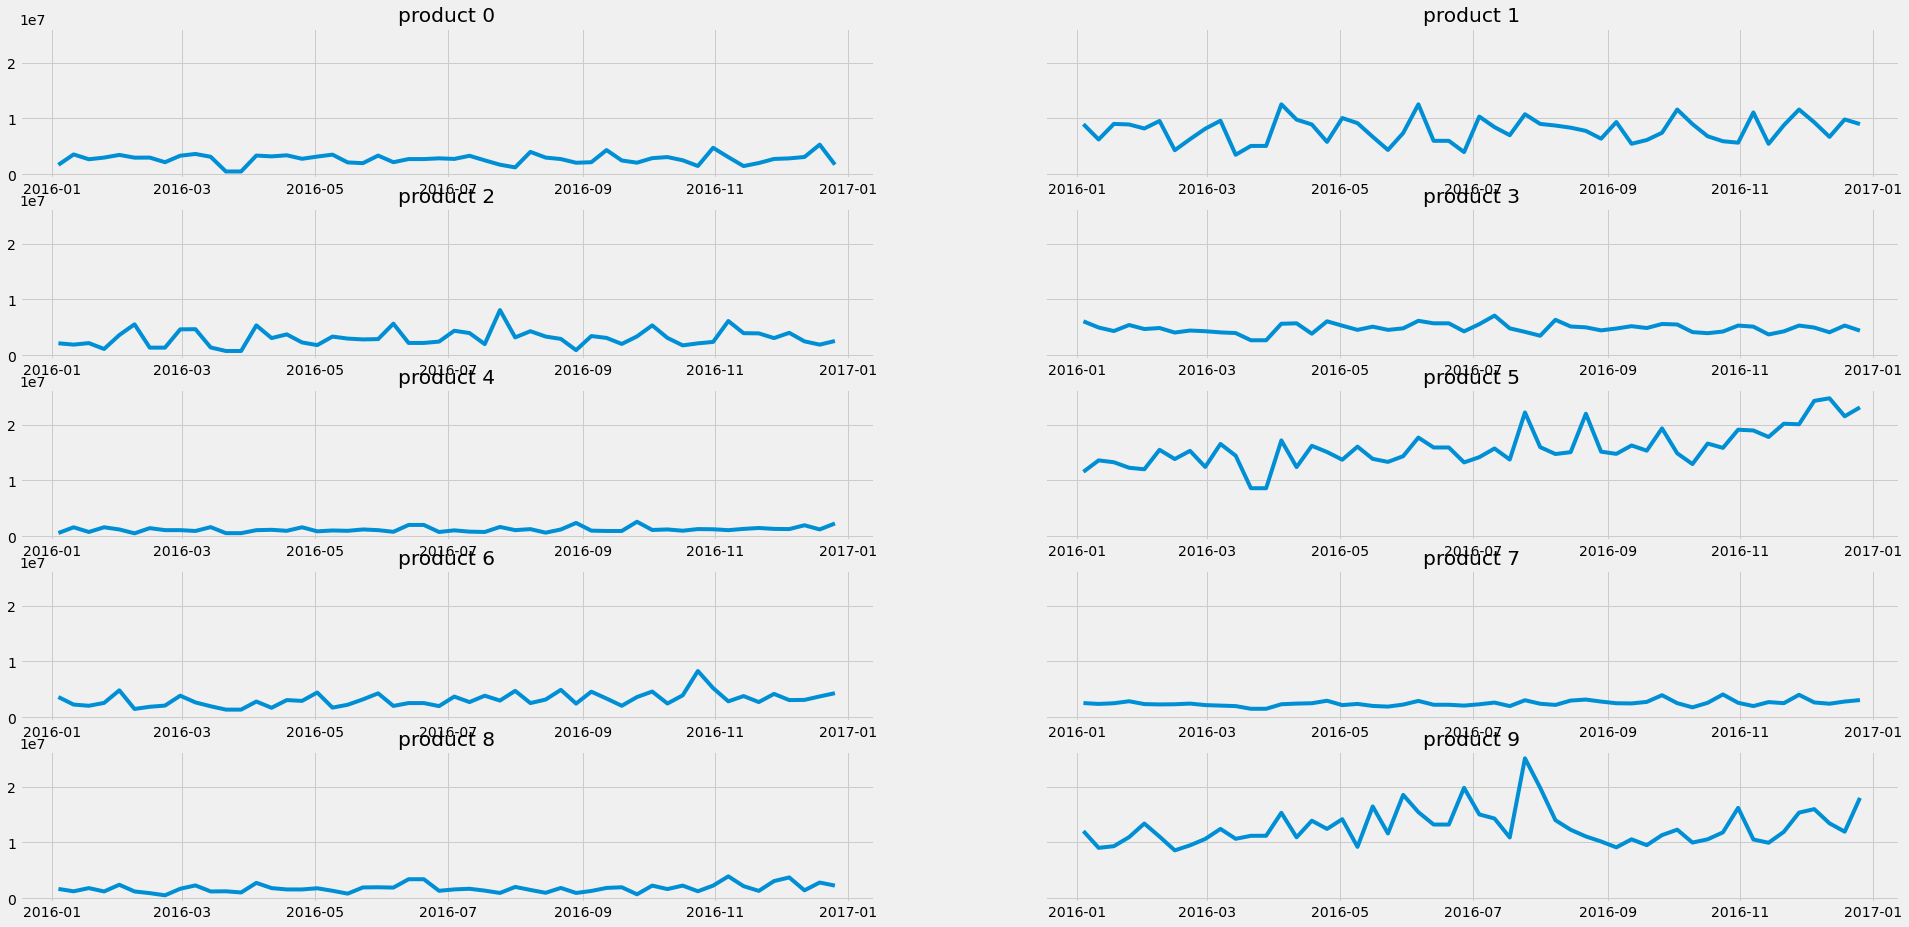

In [177]:
# Plot error for each product for a year

start = dt.date(2017,1,1)
end = dt.date(2016,1,1)

df_ddate_product = df_ddate_product.loc[(df_ddate_product['ddate'] < start)&(df_ddate_product['ddate'] > end)]

    
columns = 2
rows = 5
fig, ax_array = plt.subplots(rows, columns,squeeze=False, sharey=True)
fig.set_size_inches(30,15)

h = 0
for i,ax_row in enumerate(ax_array):
    for j,axes in enumerate(ax_row):
        temp = df_ddate_product.loc[df_ddate_product['product'] == h]
        axes.set_title(f'product {h}')
        axes.plot(temp['ddate'], temp['billing'])
        h+=1
plt.show()

In [ ]:
# Plot box plot: billing for each product
    
columns = 2
rows = 5
fig, ax_array = plt.subplots(rows, columns,squeeze=False, sharey=True)
fig.set_size_inches(12,9)

yticks = np.arange(round(df_ddate_product['billing'].min()), round(df_ddate_product['billing'].max())+1000, 1000)
ylabels = [str(round(x/1000000, 1)) for x in yticks]
plt.yticks(ticks=yticks, labels=ylabels)

h = 0
for i,ax_row in enumerate(ax_array):
    for j,axes in enumerate(ax_row):
        temp = df_ddate_product.loc[df_ddate_product['product'] == h]
        axes.set_title(f'product {h}')
        axes.boxplot(temp['billing'], showmeans=True)
        axes.yaxis.grid(True)
        axes.xaxis.grid(False)
        axes.set_xticks(ticks=[])
        h+=1

# plt.savefig('box_errors.png')
plt.show()

In [ ]:
df_ddate_product

# 12 06 22

In [1]:
def _df_perparation(df_):
        '''
        rename columns, create a column with date in iso format, create unique indexes from products' names
        '''
        df = df_.copy()
        df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)
        df['Billing'].loc[df['Billing'].isna()] = 0
        df['Fc_and_order'].loc[df['Fc_and_order'].isna()] = 0
        products = df['Sp_number'].unique()
        prod2idx = {}
        idx2prod = {}
        for idx, prod in enumerate(products):
            if prod not in prod2idx:
                prod2idx[prod] = idx
                idx2prod[idx] = prod

        #Add column with integer product names

        products_int = []
        for idx, row in df['Sp_number'].iteritems():
            products_int.append(prod2idx[row])

        df['products'] = products_int
        
        mapper = {
            'products': 'product',
            'Fc_horizon': 'horizon',
            'Fc_and_order': 'forecast',
            'Billing': 'billing',
            "Due_date": "ddate",
            "Fc_date": "fdate"
        }
        
        df.rename(columns=mapper, inplace=True)
        df['isodate'] = df[['ddate']].apply(lambda x: dt.datetime.strptime(str(x['ddate'])+'-1',"%Y%W-%w"), axis=1)
        return df

In [3]:
import os
import pandas as pd
import datetime as dt

DIR = os.path.join(os.getcwd()+"\..\data")
if not os.path.exists(DIR):
    print("PROVIDE PATH TO FILE MANUALLY")

FILE_NAME = "q1_2018.xlsx" #rewrite: read file name from settings.py
PATH = os.path.join(DIR, FILE_NAME)
TRAIN_TEST_DATE='2018-01-01'
df = pd.read_excel(PATH, index_col=None, header=1)

df = _df_perparation(df)

In [29]:
df48 = df[['isodate', 'billing']].loc[df['product'] == 7].drop_duplicates(['isodate'])
df48.set_index(['isodate'], inplace=True)
df48.index = pd.DatetimeIndex(df48.index).to_period('W')

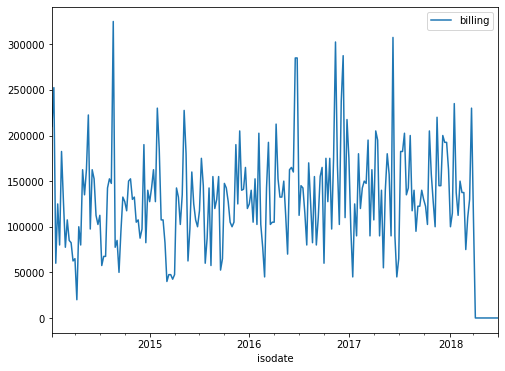

In [30]:
df48.plot(figsize=(8,6))

In [14]:
df19['2017':].index

PeriodIndex(['2016-12-26/2017-01-01', '2017-01-02/2017-01-08',
             '2017-01-09/2017-01-15', '2017-01-16/2017-01-22',
             '2017-01-23/2017-01-29', '2017-01-30/2017-02-05',
             '2017-02-06/2017-02-12', '2017-02-13/2017-02-19',
             '2017-02-20/2017-02-26', '2017-02-27/2017-03-05',
             '2017-03-06/2017-03-12', '2017-03-13/2017-03-19',
             '2017-03-20/2017-03-26', '2017-03-27/2017-04-02',
             '2017-04-03/2017-04-09', '2017-04-10/2017-04-16',
             '2017-04-17/2017-04-23', '2017-04-24/2017-04-30',
             '2017-05-01/2017-05-07', '2017-05-08/2017-05-14',
             '2017-05-15/2017-05-21', '2017-05-22/2017-05-28',
             '2017-05-29/2017-06-04', '2017-06-05/2017-06-11',
             '2017-06-12/2017-06-18', '2017-06-19/2017-06-25',
             '2017-06-26/2017-07-02', '2017-07-03/2017-07-09',
             '2017-07-10/2017-07-16', '2017-07-17/2017-07-23',
             '2017-07-24/2017-07-30', '2017-07-31/2017-

TypeError: float() argument must be a string or a number, not 'Period'

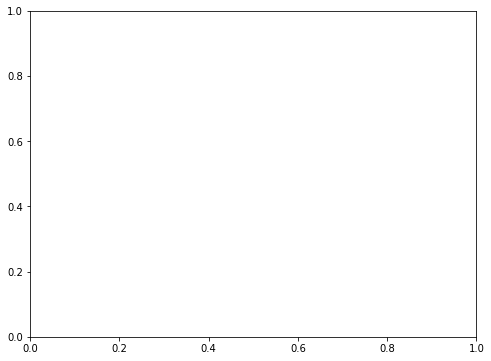

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(df19['2017':].index, df19['2017':].values)
# plt.yticks(prod19)
plt.ylim( [min(df19['2017':])-10000, max(df19['2017':])+10000] )
plt.show()